In [ ]:
# there apparently are errors in the downloaded price data, which can lead to extreme return values (e.g. occasionally > 1m % daily returns for cryptos, + some cases in other asset classes as well).
# these cases need to be dealt with, otherwise they could skew the entire analysis. 


In [1]:
# load all price and return data
import pandas as pd

# load price data
price_path = "prices"
prices_dfs = {"stock": pd.read_csv(f"{price_path}/stocks_adj_close.csv", sep=";"),
                "etf": pd.read_csv(f"{price_path}/etfs_adj_close.csv", sep=";"),
                "crypto": pd.read_csv(f"{price_path}/cryptos_adj_close.csv", sep=";"),
                "commodity": pd.read_csv(f"{price_path}/commodities_adj_close.csv", sep=";")
    }


# load returns data
returns_path = "returns"
returns_dfs = {"stock": pd.read_csv(f"{returns_path}/stocks_returns.csv", sep=";"),
               "etf": pd.read_csv(f"{returns_path}/etfs_returns.csv", sep=";"),
                "crypto": pd.read_csv(f"{returns_path}/cryptos_returns.csv", sep=";"),
                "commodity": pd.read_csv(f"{returns_path}/commodities_returns.csv", sep=";"),
                "benchmark": pd.read_csv(f"{returns_path}/benchmarks_returns.csv", sep=";")
}

In [ ]:
extreme_neg_return_threshold = -0.95

for name, df in returns_dfs.items():
    c = 0
    for t in df.columns[1:]:
        # get series
        s = df[t]
        # check for extreme values 
        if s.min() < extreme_neg_return_threshold:
            print(f"Extreme return value in {name} for {t}: {s.min()} on {df['date'][s.idxmin()]}")
            c += 1
    print(f"\nFound {c} extreme return values in {name} returns data.\n")

In [ ]:
extreme_return_threshold = 3

for name, df in returns_dfs.items():
    c = 0
    for t in df.columns[1:]:
        # get series
        s = df[t]
        # check for extreme values 
        if s.max() > extreme_return_threshold and s.max() < 5:
            print(f"Extreme return value in {name} for {t}: {s.max()} on {df['date'][s.idxmax()]}")
            c += 1
    print(f"Found {c} extreme return values in {name} returns data.")

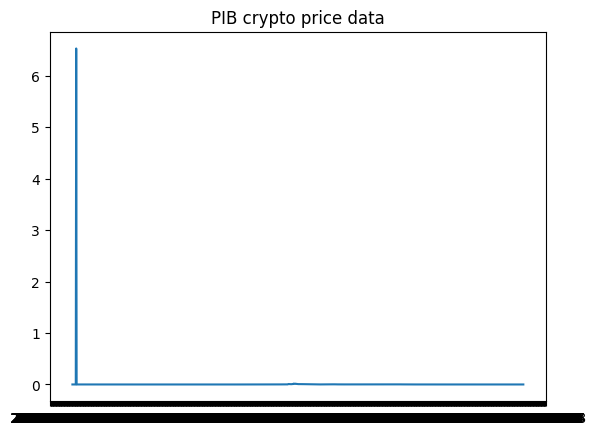

In [14]:
# plot price data for specific ticker and asset type

import matplotlib.pyplot as plt

def plot_price_data(ticker, asset_type):
    df = prices_dfs[asset_type]
    s = df[["date", ticker]]
    plt.plot(s["date"], s[ticker])
    plt.title(f"{ticker} {asset_type} price data")
    plt.show()

plot_price_data("PIB", "crypto")

<Axes: >

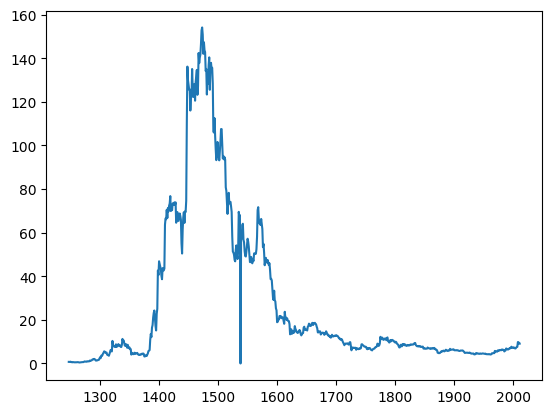

In [2]:
prices_dfs["crypto"]["AXS"].plot()

In [3]:
prices_dfs["crypto"]["AXS"][1520:1560]

1520    7.382290e+01
1521    7.410370e+01
1522    7.202392e+01
1523    6.946208e+01
1524    5.820558e+01
1525    5.128431e+01
1526    5.084132e+01
1527    4.982164e+01
1528    4.746428e+01
1529    4.682569e+01
1530    5.219764e+01
1531    5.414193e+01
1532    4.953945e+01
1533    4.789386e+01
1534    5.169283e+01
1535    6.951801e+01
1536    6.748942e+01
1537    6.796564e+01
1538    3.444580e-09
1539    5.811753e+01
1540    5.724787e+01
1541    6.344145e+01
1542    6.407649e+01
1543    5.672468e+01
1544    5.558416e+01
1545    5.144238e+01
1546    4.929794e+01
1547    4.904811e+01
1548    5.145295e+01
1549    5.460284e+01
1550    5.718974e+01
1551    5.582036e+01
1552    5.354280e+01
1553    4.970961e+01
1554    4.649361e+01
1555    4.648534e+01
1556    4.883808e+01
1557    4.682304e+01
1558    4.592708e+01
1559    4.784383e+01
Name: AXS, dtype: float64

<Axes: >

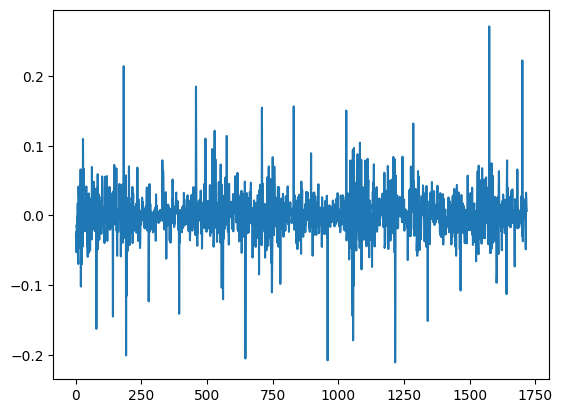

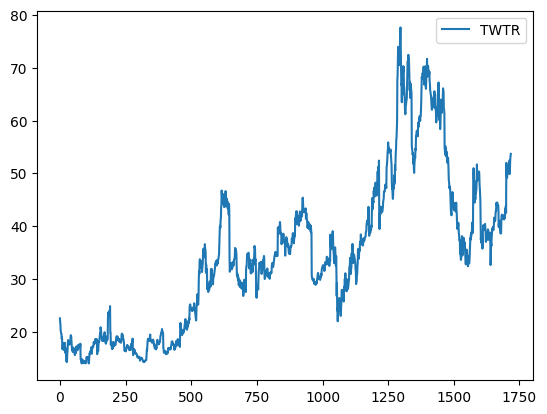

In [2]:
# test return computation
from asset_data_utils import get_returns_from_prices

# get returns for stock TWTR
p = prices_dfs["stock"][["date", "TWTR"]]
r = get_returns_from_prices(p)

r["TWTR"].plot()
p.plot()


In [9]:
# load nats dfs
nats_path = "names_and_tickers_with_price_availability"
nats_dfs = {"stock": pd.read_csv(f"{nats_path}/stocks.csv", sep=";"),
            "etf": pd.read_csv(f"{nats_path}/etfs.csv", sep=";"),
            "crypto": pd.read_csv(f"{nats_path}/cryptos.csv", sep=";"),
            "commodity": pd.read_csv(f"{nats_path}/commodities.csv", sep=";")
}

In [43]:
nats_dfs["crypto"][nats_dfs["crypto"]["Code_clean"] == "LUNA"]

,Code_clean,Code,Name,Country,Exchange,Currency,Type,Isin,delisted_as_of_may_2024,in_top200_as_of_dec_2022,earliest_price_date,latest_price_date,has_price_data,n_trading_days_between_earliest_and_latest,n_prices_between_earliest_and_latest,n_missing_prices_between_earliest_and_latest,missing_prices_ratio,longest_missing_price_sequence,price_data_errors_likely,has_returns
186,LUNA,LUNA-USD,Luna Coin,Unknown,CC,USD,Currency,NaN,True,True,2019-08-07,2022-05-11,True,697.0,697.0,0.0,0.0,0.0,True,False
